# Numerické řešení rovnice vedení tepla metodou sítí

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import imageio
import os

In [62]:
def zobrazit_obl(matice, x0, xn, t0, tn, imgs_cesty, n, zobrazit_obl= True):
    obrazek = np.rot90(deepcopy(matice))
    plt.figure(figsize=(8,8))
    plt.imshow(obrazek, cmap='jet',extent=[x0, xn, t0, tn] )
    plt.colorbar(shrink = 0.5)
    plt.title(f'Krok {n}')
    plt.savefig(f'imgs/krok_{n}.png')
    if zobrazit_obl == False: plt.close()
    plt.show()
    imgs_cesty.append(f'imgs/krok_{n}.png')

## P.P

sigma<= 0.5

In [63]:
imgs_cesty = []
pocet_kroku = 500

x0, xn = 0., 4.
t0, tn = 0., 4.
parametry = [x0, xn, t0, tn, imgs_cesty]
b = 4.

h = 0.1
tau = 0.01

sigma = 0.5 * tau / h**2

In [64]:
sigma

0.4999999999999999

In [65]:
u_t0 = 1
u_bt = 1/ (1 + b**2)
u_x = [1/ (1 + xi**2) for xi in np.arange(x0, xn+h, h)]

x = np.arange(x0, xn+h, h)
t = np.arange(t0, tn+tau, tau )

In [66]:
len_x,len_t = len(x), len(t)

u = np.zeros((len_x, len_t))
u[:, 0] = u_x
u[0, :] = u_t0
u[-1, :] = u_bt

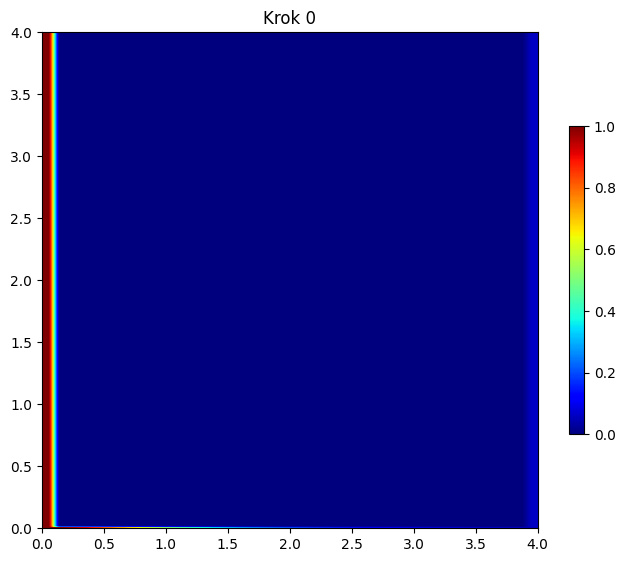

In [67]:
zobrazit_obl(u, *parametry, n=0)

## Explicitni metoda

In [68]:
novy_u = deepcopy(u)
for n in range(1,pocet_kroku):
    for k in range(1, len_t-1):
        for i in range(1, len_x-1):
            novy_u[i, k+1] = sigma*(u[i-1, k] + u[i+1, k]) + (1. - 2. * sigma)* u[i, k] + tau * np.sin(t[k])
    if n % 5 ==0:
        zobrazit_obl(novy_u, *parametry, n, zobrazit_obl= False)
    u = deepcopy(novy_u)

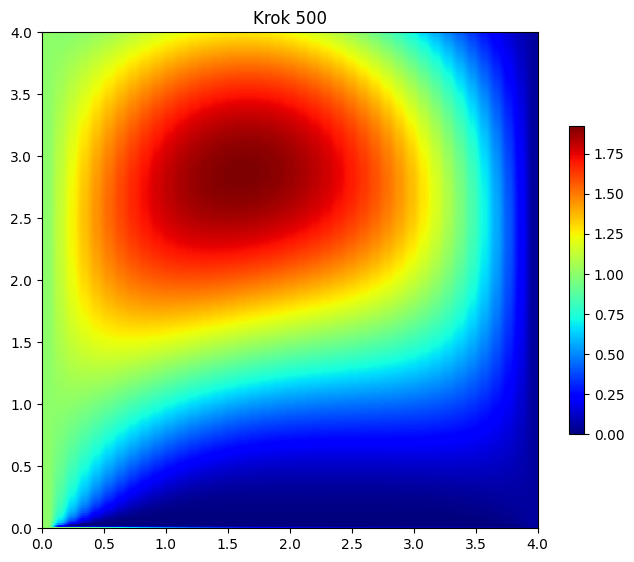

In [69]:
zobrazit_obl(novy_u, *parametry, n = pocet_kroku)

In [70]:
with imageio.get_writer('expl_2_simulace.gif', mode='I', duration=0.01) as writer:
    for cesta in imgs_cesty:
        image = imageio.imread(cesta)
        writer.append_data(image)

C:\Users\Home\AppData\Local\Temp\ipykernel_8404\3822766531.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(cesta)


In [71]:
for cesta in imgs_cesty:
    os.remove(cesta)